In [1]:
#!pip install yfinance
#!pip install yahoofinancials

import pandas as pd
import yfinance as yf


ltc = yf.download('LTC-USD',
                      start='2019-01-01',
                      end='2024-12-29',
                      progress=False,
)
ltc.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,LTC-USD,LTC-USD,LTC-USD,LTC-USD,LTC-USD,LTC-USD
Date,,,,,,
2019-01-01,31.979931,31.979931,32.097584,30.264280,30.458393,379429124
2019-01-02,33.433681,33.433681,33.793324,31.765974,32.021229,414331918
2019-01-03,32.026699,32.026699,33.420704,31.592480,33.353573,345068249
2019-01-04,32.404167,32.404167,33.023350,31.437557,32.016525,391010579
2019-01-05,34.936867,34.936867,36.143440,32.344795,32.345547,640607603


In [2]:
#Close price data
closing_price = ltc[['Close']]

In [3]:
closing_price['Close']

Ticker,LTC-USD
Date,
2019-01-01,31.979931
2019-01-02,33.433681
2019-01-03,32.026699
2019-01-04,32.404167
2019-01-05,34.936867
...,...
2024-12-24,108.324379
2024-12-25,109.577957
2024-12-26,102.141678


In [4]:
import matplotlib.pyplot as plt

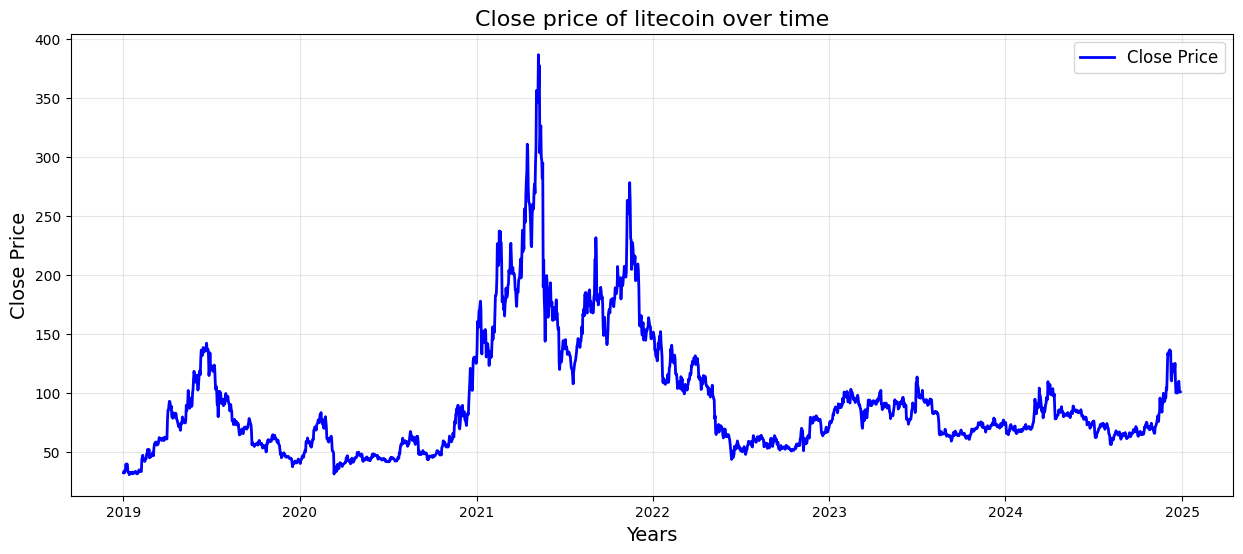

In [5]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.title("Close price of litecoin over time", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [6]:
# Moving Average
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# moving average for 5 day -> null null null null 30.0 40.0
print(sum(temp_data[1:6])/5)

40.0


In [7]:
df1 = pd.DataFrame(temp_data)

In [8]:
df1.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [9]:
for i in range(2019, 2025):
    print(i, list(ltc.index.year).count(i))

2019 365
2020 366
2021 365
2022 365
2023 365
2024 363


In [10]:
closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()

<ipython-input-10-63837559cb05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
<ipython-input-10-63837559cb05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()


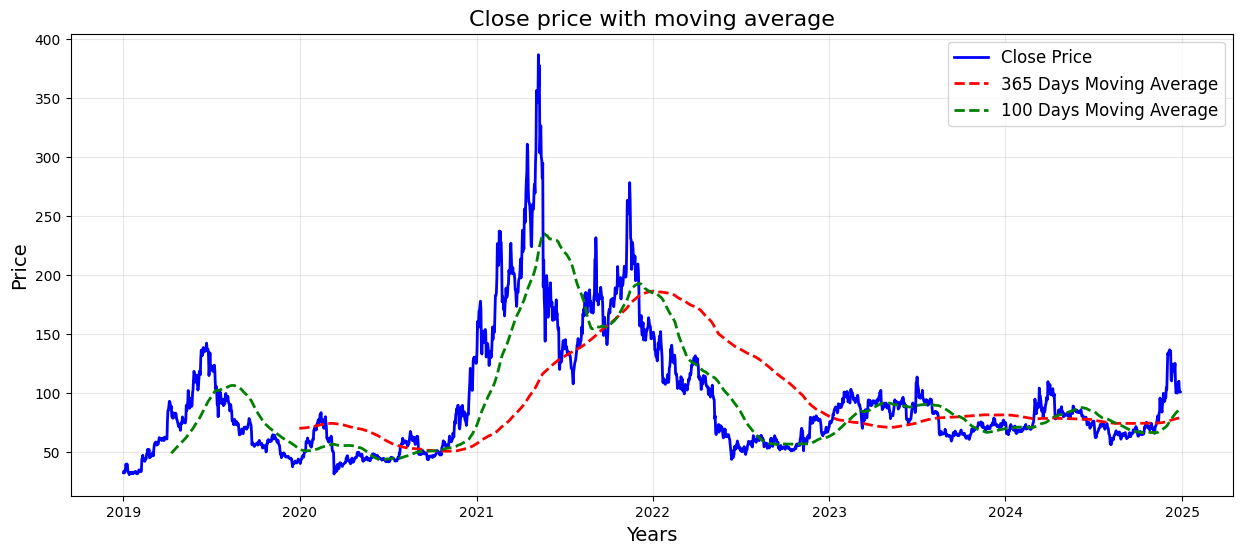

In [11]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.plot(closing_price.index, closing_price['MA_365'], label = '365 Days Moving Average', color = 'red', linestyle ="--", linewidth =2)
plt.plot(closing_price.index, closing_price['MA_100'], label = '100 Days Moving Average', color = 'green',linestyle ="--", linewidth =2)

plt.title("Close price with moving average", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())

In [13]:
len(scaled_data)

2189

In [14]:
import numpy as np

In [15]:
# Prepare data
x_data = []
y_data = []
base_days =100
for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days: i])
    y_data.append(scaled_data[i])
x_data = np.array(x_data)
x_data = x_data.reshape(2089, 100)
y_data = np.array(y_data)

In [16]:
x_data.shape

(2089, 100)

In [17]:
# Split into train and test sets
train_size = int(len(x_data) * 0.9)
x_train , y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]

In [18]:
x_train.shape

(1880, 100)

In [19]:
x_train[0]

array([0.00462497, 0.00870719, 0.0047563 , 0.00581625, 0.01292822,
       0.02517694, 0.02098568, 0.02568481, 0.02429712, 0.00992119,
       0.00560132, 0.00576081, 0.        , 0.00568729, 0.00329714,
       0.00418547, 0.00436865, 0.00274794, 0.00622779, 0.00236862,
       0.00247101, 0.00379517, 0.00468682, 0.00686068, 0.00743831,
       0.00791206, 0.00634604, 0.00243279, 0.00214596, 0.00448744,
       0.00370461, 0.00700381, 0.01140614, 0.00872284, 0.01060247,
       0.01101812, 0.00730121, 0.00811395, 0.03687494, 0.04059719,
       0.04631756, 0.03608256, 0.03817765, 0.03275529, 0.03175255,
       0.03472662, 0.0372401 , 0.03817688, 0.0497315 , 0.04923027,
       0.06024148, 0.05284403, 0.05468087, 0.05994653, 0.04028356,
       0.04459245, 0.04256521, 0.04281876, 0.04466037, 0.04817041,
       0.05246147, 0.05067823, 0.04520732, 0.06402251, 0.07146898,
       0.07541361, 0.07235428, 0.07793485, 0.07539349, 0.07044667,
       0.07487453, 0.07188712, 0.07371516, 0.08046875, 0.08848

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# Initialize and train models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [22]:
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {'MSE': mse, 'R^2': r2}

# Print results
for model_name, metrics in results.items():
    print(f"{model_name} - MSE: {metrics['MSE']}, R^2: {metrics['R^2']}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Linear Regression - MSE: 0.00011544435385108156, R^2: 0.9555639158116533
Random Forest - MSE: 0.00012042004294434753, R^2: 0.9536487061710969
Gradient Boosting - MSE: 0.0001167354837204361, R^2: 0.9550669425629943


In [23]:
predictions = models['Linear Regression'].predict(x_test)
# Reshape predictions to a 2D array before inverse transforming
predictions = predictions.reshape(-1, 1)  # Reshape to have one column
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

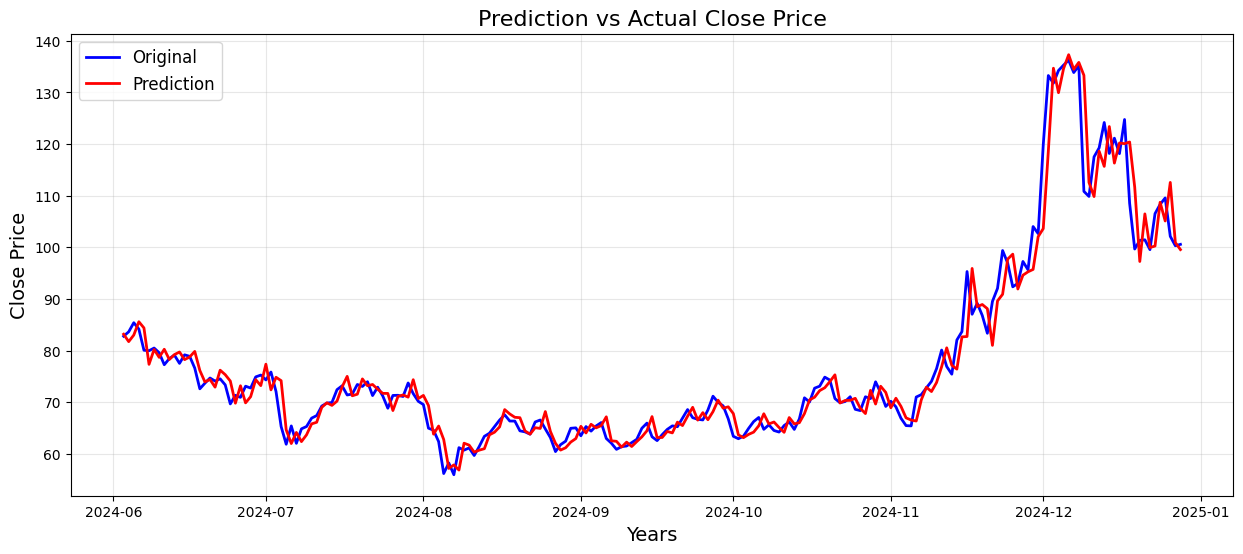

In [24]:
plotting_data = pd.DataFrame(
    {
        'Original': inv_y_test.flatten(),
        'Prediction': inv_predictions.flatten(),
    }, index = closing_price.index[train_size + base_days:]
)

plt.figure(figsize = (15, 6))
plt.plot(plotting_data.index, plotting_data['Original'], label = 'Original', color = 'blue', linewidth =2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label = 'Prediction', color = 'red',  linewidth =2)

plt.title("Prediction vs Actual Close Price", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [25]:
# Predict future days
last_100  = scaled_data[-100:].reshape(1, -1)
future_predictions=[]
for _ in range(10):
    next_days = models['Gradient Boosting'].predict(last_100)
    # Reshape next_days to a 2D array before inverse transforming
    next_days = next_days.reshape(-1, 1)
    future_predictions.append(scaler.inverse_transform(next_days))
    last_100 = np.append(last_100[:, 1:], next_days, axis = 1) # next_days is already 2D

In [26]:
future_predictions

[array([[101.02489884]]),
 array([[100.92268505]]),
 array([[101.02489884]]),
 array([[101.02489884]]),
 array([[99.87675392]]),
 array([[99.87675392]]),
 array([[99.77454013]]),
 array([[99.87675392]]),
 array([[98.84784477]]),
 array([[97.57391699]])]

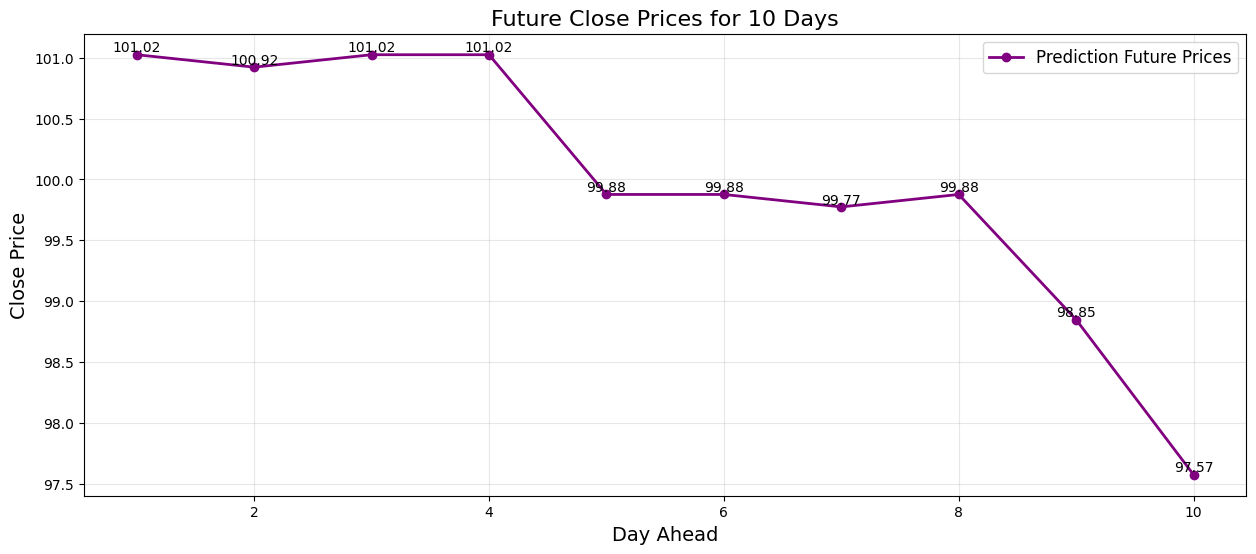

In [27]:
future_predictions = np.array(future_predictions).flatten()

plt.figure(figsize = (15, 6))
plt.plot(range(1, 11), future_predictions, marker="o" ,label = 'Prediction Future Prices', color = 'purple', linewidth =2)

for i, val in enumerate(future_predictions):
    plt.text(i+1,val,  f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color='black')

plt.title("Future Close Prices for 10 Days", fontsize = 16)
plt.xlabel("Day Ahead", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [28]:
import joblib

# Save the model and scaler
joblib.dump(models['Linear Regression'], 'linear_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [29]:
from google.colab import files

# Download the saved files
files.download('linear_regression_model.pkl')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
# Save last_100 to a .npy file
np.save('last_100.npy', last_100)

# Download the saved file
files.download('last_100.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>